In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

In [45]:
data = pd.read_csv('C:/Users/Kotos/Desktop/chess_games.csv', sep=",")

In [46]:
# размер набора данных
data.shape

(20058, 17)

In [47]:
# типы колонок
data.dtypes

game_id               int64
rated                  bool
turns                 int64
victory_status       object
winner               object
time_increment       object
white_id             object
white_rating          int64
black_id             object
black_rating          int64
moves                object
opening_code         object
opening_moves         int64
opening_fullname     object
opening_shortname    object
opening_response     object
opening_variation    object
dtype: object

In [48]:
# проверим есть ли пропущенные значения
data.isnull().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

In [49]:
# Первые 5 строк датасета
data.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [50]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 20058


In [51]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((20058, 17), (20058, 15))

In [52]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((20058, 17), (754, 17))

In [54]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,0,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,0,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,0,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,0,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,0,0


In [56]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка opening_response. Тип данных object. Количество пустых значений 18851, 93.98%.
Колонка opening_variation. Тип данных object. Количество пустых значений 5660, 28.22%.


In [57]:
cat_temp_data = data[['opening_response']]
cat_temp_data.head()

,opening_response
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [58]:
cat_temp_data['opening_response'].unique()

array([nan, 'Refused', 'Accepted', 'Declined'], dtype=object)

In [59]:
cat_temp_data[cat_temp_data['opening_response'].isnull()].shape

(18851, 1)

In [60]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Declined'],
       ['Declined'],
       ['Declined'],
       ...,
       ['Declined'],
       ['Declined'],
       ['Declined']], dtype=object)

In [61]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Accepted', 'Declined', 'Refused'], dtype=object)

In [62]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['NA'],
       ['NA'],
       ['NA'],
       ...,
       ['NA'],
       ['NA'],
       ['NA']], dtype=object)

In [63]:
np.unique(data_imp3)

array(['Accepted', 'Declined', 'NA', 'Refused'], dtype=object)

In [64]:
data_imp3[data_imp3=='NA'].size

18851

In [65]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Declined
1,Declined
2,Declined
3,Declined
4,Declined
...,...
20053,Declined
20054,Declined
20055,Declined
20056,Declined


In [67]:
cat_enc['c1'].unique()

array(['Declined', 'Refused', 'Accepted'], dtype=object)

In [68]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [69]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['Accepted', 'Declined', 'Refused'], dtype=object)

In [70]:
cat_enc_le

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [72]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2])

array(['Accepted', 'Declined', 'Refused'], dtype=object)

In [75]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['white_rating']])

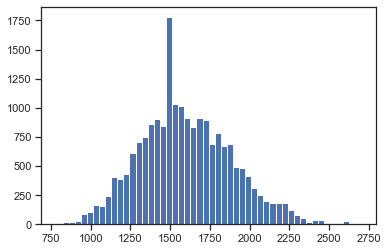

In [76]:
plt.hist(data['white_rating'], 50)
plt.show()

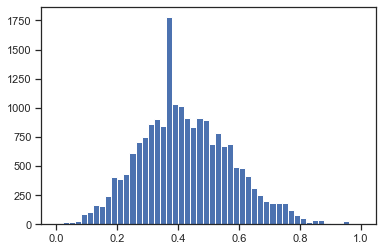

In [77]:
plt.hist(sc1_data, 50)
plt.show()

In [78]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['white_rating']])

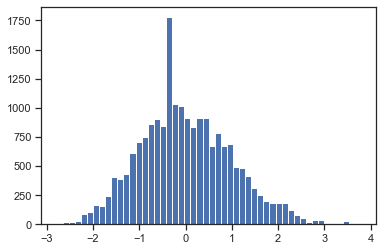

In [79]:
plt.hist(sc2_data, 50)
plt.show()